# **1. Perkenalan Dataset**

### **Dataset Produksi Padi dan Perubahan Iklim di Pulau Sumatera (1993-2020)**

Dataset ini dirancang untuk menganalisis dan memprediksi hasil panen padi di delapan provinsi utama di Pulau Sumatera dengan mempertimbangkan faktor perubahan iklim. Sebagian besar lahan pertanian di Sumatera didedikasikan untuk padi, namun produksinya sangat rentan terhadap fluktuasi iklim seperti perubahan pola curah hujan, suhu, dan kelembapan.

Tujuan utamanya adalah membangun model *machine learning* yang mampu memprediksi total produksi padi, sebagai langkah untuk mendukung ketahanan pangan sejalan dengan *Sustainable Development Goals (SDGs)*.

#### **Isi Dataset**

Dataset ini menggabungkan dua sumber data utama dari rentang tahun 1993 hingga 2020:

1.  **Data Pertanian (Badan Pusat Statistik - BPS)**:
    * `Provinsi`: Nama provinsi di Pulau Sumatera (Aceh, Sumatera Utara, Riau, Jambi, Sumatera Selatan, Bengkulu, Lampung).
    * `Luas Panen (Ha)`: Total area lahan padi yang dipanen dalam Hektar.
    * `Produksi (Ton)`: Total hasil produksi padi dalam Ton.
    * `Tahun`: Tahun pencatatan data.

2.  **Data Iklim (Badan Meteorologi, Klimatologi, dan Geofisika - BMKG)**:
    * `Curah Hujan (mm)`: Rata-rata curah hujan tahunan.
    * `Kelembapan (%)`: Rata-rata tingkat kelembapan tahunan.
    * `Suhu Rata-rata (°C)`: Rata-rata suhu udara tahunan.

Dengan menggunakan data ini, Anda ditantang untuk membangun sebuah model regresi untuk memprediksi `Produksi (Ton)` berdasarkan variabel iklim dan pertanian yang tersedia.

# **2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.DataFrame(pd.read_csv("drive/MyDrive/padi/padi.csv"))

# **4. Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(684, 3)

In [ ]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
df.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
df.isna().sum()

,0
Provinsi,0
Tahun,0
Produksi,0
Luas Panen,0
Curah hujan,0
Kelembapan,0
Suhu rata-rata,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
pd.pivot_table(df,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

<ipython-input-24-aeda496cf39b>:1: FutureWarning: The provided callable <function mean at 0x7e2def7b13a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)


,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


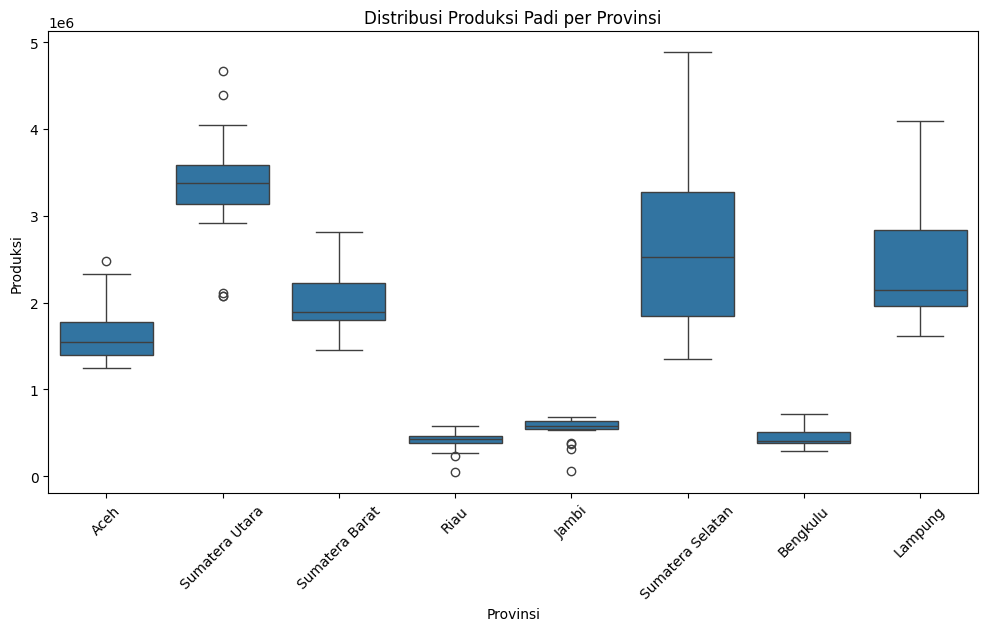

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Provinsi', y='Produksi', data=df)
plt.title('Distribusi Produksi Padi per Provinsi')
plt.xticks(rotation=45)
plt.show()

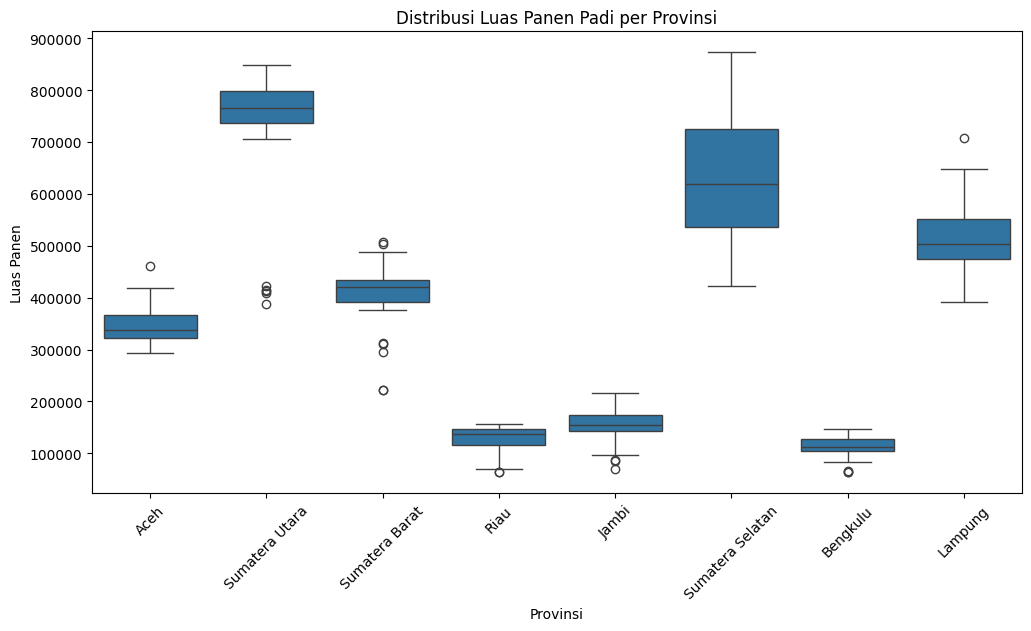

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Provinsi', y='Luas Panen', data=df)
plt.title('Distribusi Luas Panen Padi per Provinsi')
plt.xticks(rotation=45)
plt.show()

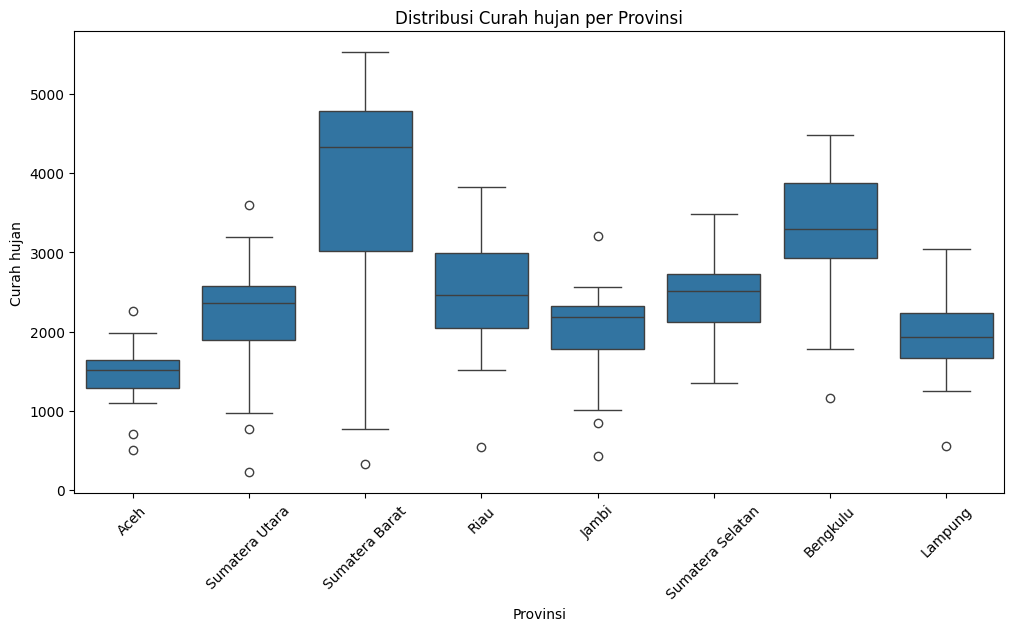

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Provinsi', y='Curah hujan', data=df)
plt.title('Distribusi Curah hujan per Provinsi')
plt.xticks(rotation=45)
plt.show()

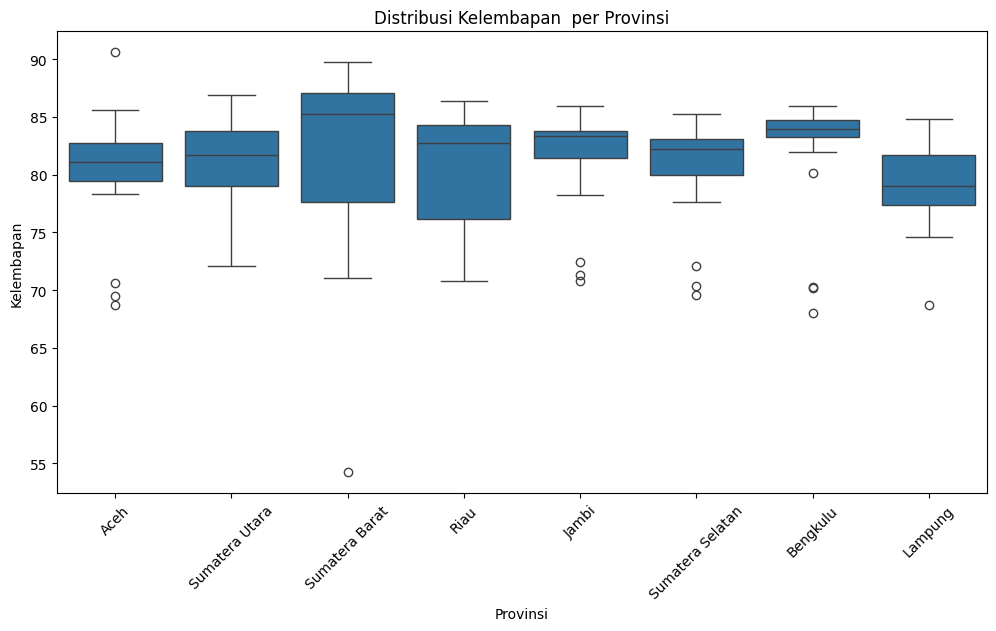

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Provinsi', y='Kelembapan', data=df)
plt.title('Distribusi Kelembapan  per Provinsi')
plt.xticks(rotation=45)
plt.show()

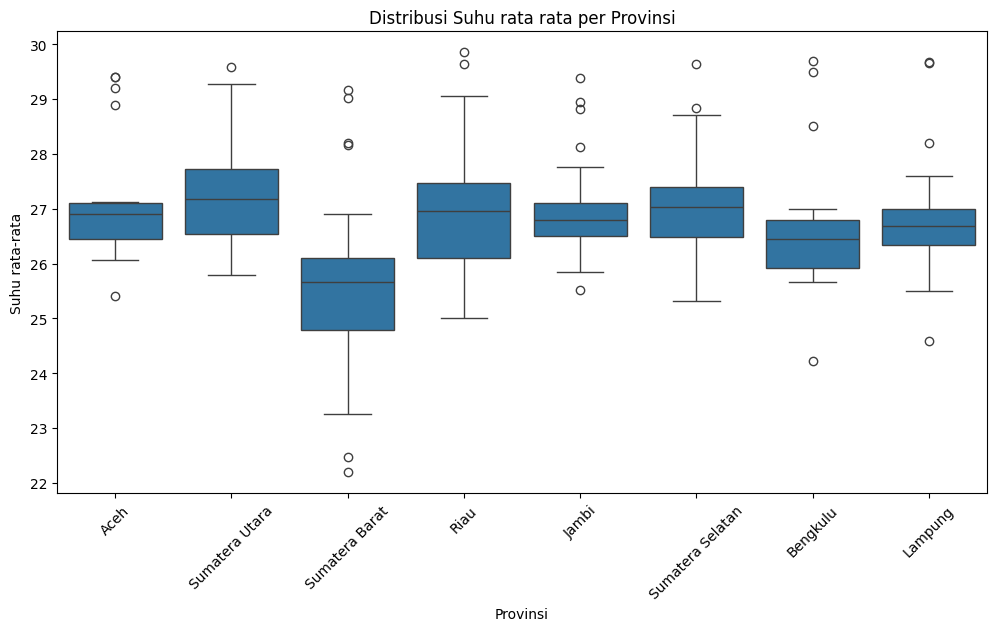

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Provinsi', y='Suhu rata-rata', data=df)
plt.title('Distribusi Suhu rata rata per Provinsi')
plt.xticks(rotation=45)
plt.show()

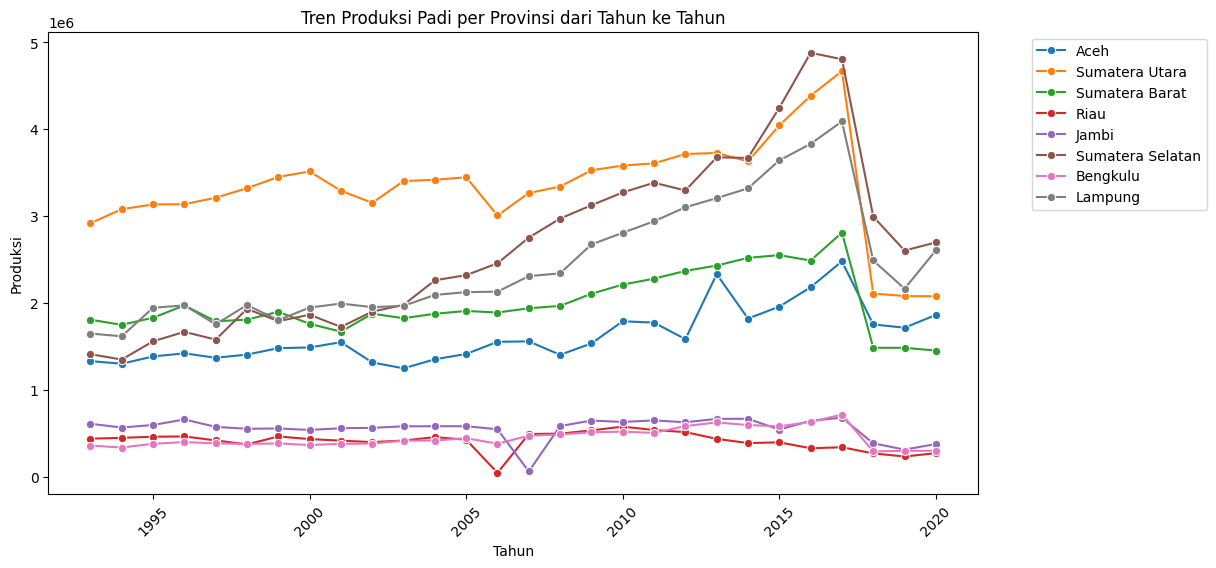

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Tahun', y='Produksi', hue='Provinsi', data=df, marker='o')
plt.title('Tren Produksi Padi per Provinsi dari Tahun ke Tahun')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-21-41f84529a097>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_produksi.index, y=total_produksi.values, palette='viridis')


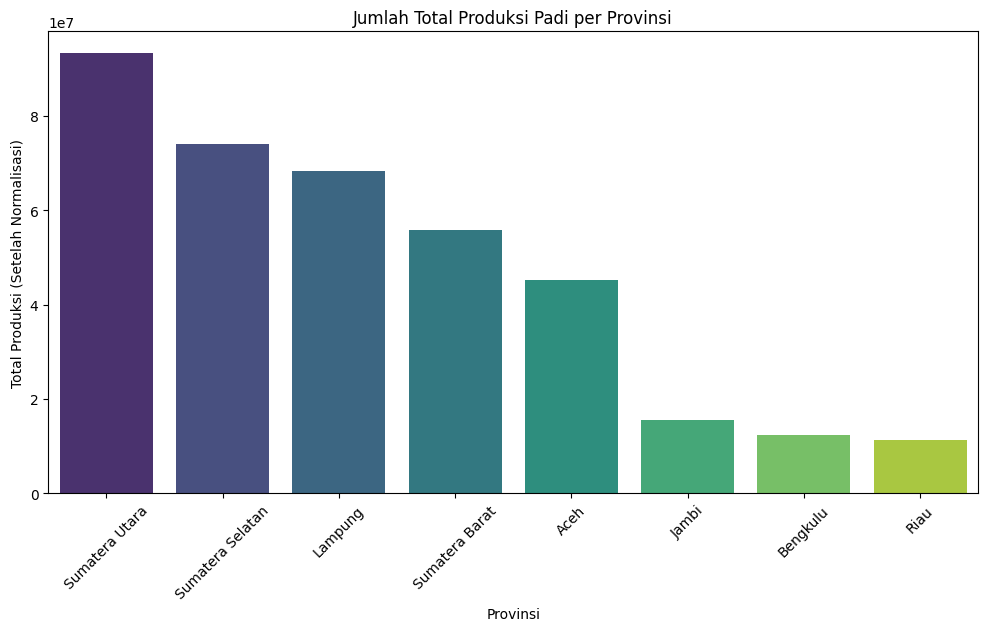

In [ ]:
total_produksi = df.groupby('Provinsi')['Produksi'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_produksi.index, y=total_produksi.values, palette='viridis')
plt.title('Jumlah Total Produksi Padi per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Produksi (Setelah Normalisasi)')
plt.xticks(rotation=45)
plt.show()

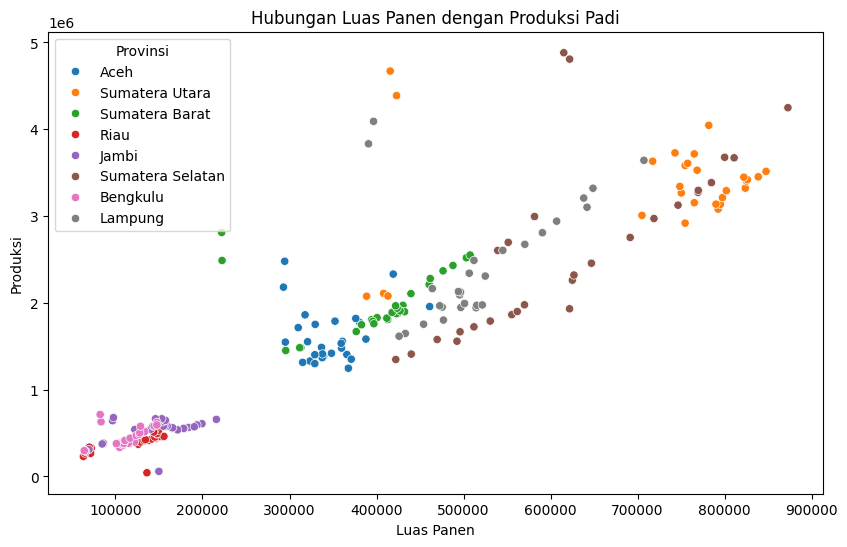

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Luas Panen', y='Produksi', hue='Provinsi', data=df)
plt.title('Hubungan Luas Panen dengan Produksi Padi')
plt.show()

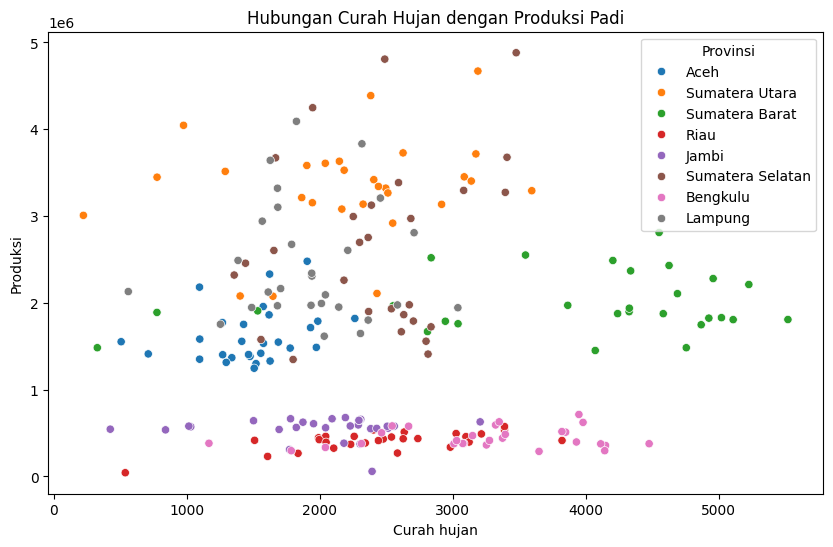

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Curah hujan', y='Produksi', hue='Provinsi', data=df)
plt.title('Hubungan Curah Hujan dengan Produksi Padi')
plt.show()

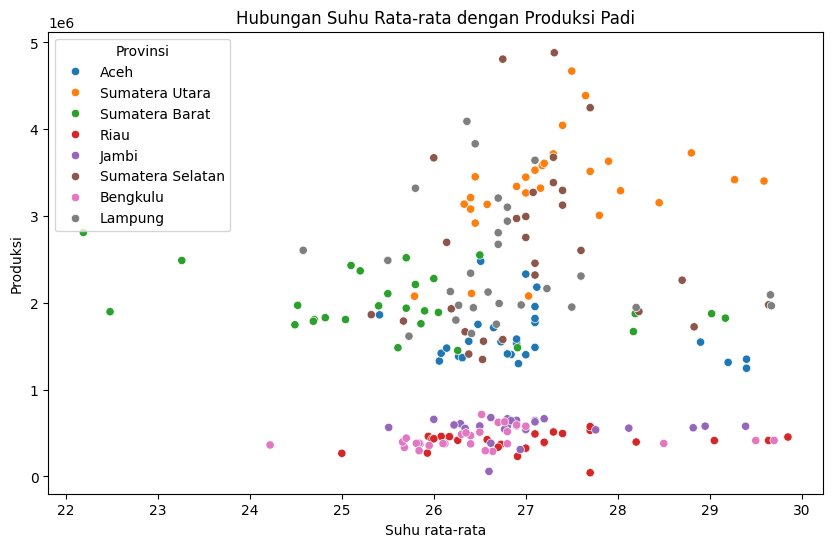

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Suhu rata-rata', y='Produksi', hue='Provinsi', data=df)
plt.title('Hubungan Suhu Rata-rata dengan Produksi Padi')
plt.show()

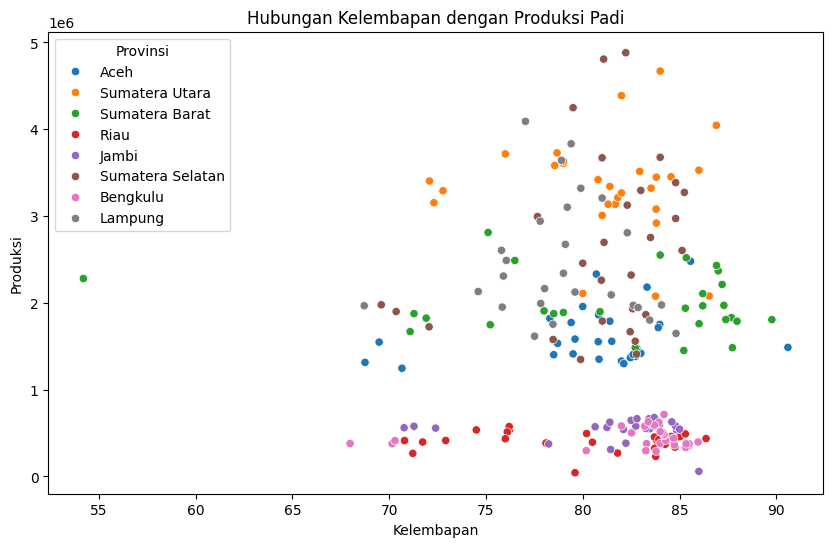

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Kelembapan', y='Produksi', hue='Provinsi', data=df)
plt.title('Hubungan Kelembapan dengan Produksi Padi')
plt.show()

<ipython-input-22-902ffc5f9e31>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Tahun', y='Produksi', data=df, estimator='sum', ci=None, marker='o')


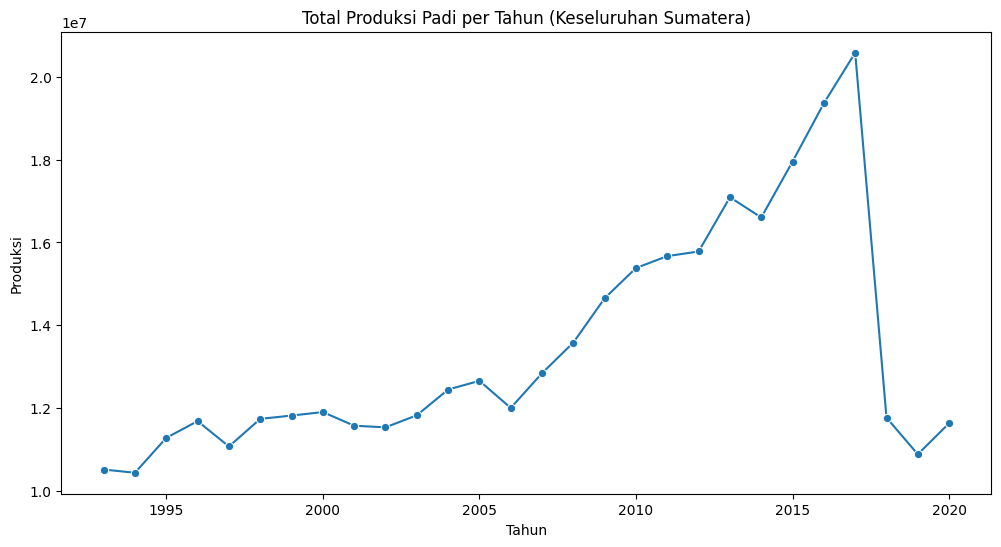

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tahun', y='Produksi', data=df, estimator='sum', ci=None, marker='o')
plt.title('Total Produksi Padi per Tahun (Keseluruhan Sumatera)')
plt.show()

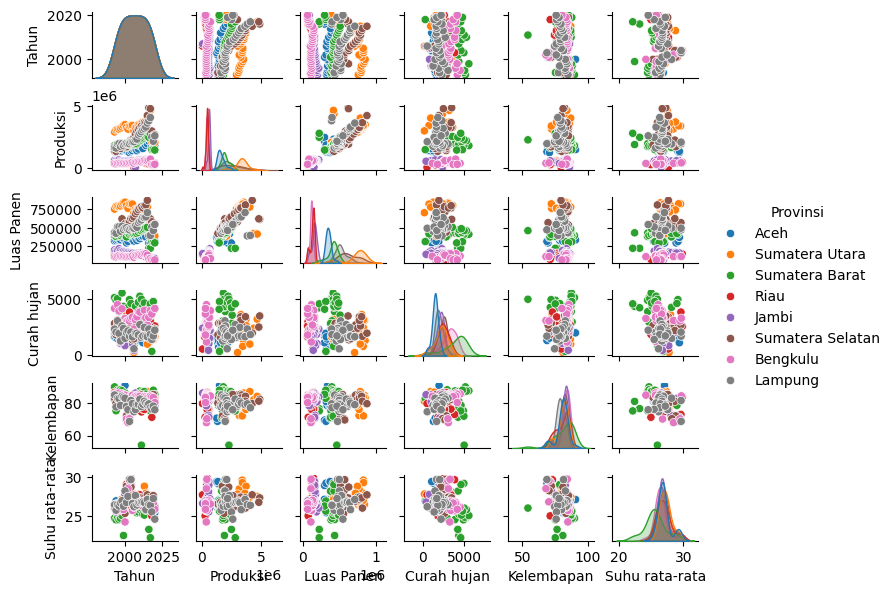

In [ ]:
sns.pairplot(df, hue='Provinsi', height=1, aspect=1.2)
plt.show()

### Insight
1. data berjumlah 224 dengan 7 kolom
2. data tidak mempunyai data duplikat dan nilai null
3. kolom data dalam dataset berupa numerik kecuali provinsi yaitu object
4. Provinsi penghasil padi terbanyak adalah Sumatera Utara dan Sumatera Selatan
5. Aceh dan Sumatera Utara memiliki outlier produksi yang menunjukkan tahun-tahun dengan hasil sangat tinggi atau sangat rendah
6. Lampung dan Sumatera Selatan memiliki luas panen yang lebih konsisten dan besar
7. Korelasi positif antara luas panen dan produksi padi

# **5. Data Preprocessing**

In [ ]:
label_encoder = LabelEncoder()
df['Provinsi'] = label_encoder.fit_transform(df['Provinsi'])

In [ ]:
inverse_label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
inverse_label_mapping

{0: 'Aceh',
 1: 'Bengkulu',
 2: 'Jambi',
 3: 'Lampung',
 4: 'Riau',
 5: 'Sumatera Barat',
 6: 'Sumatera Selatan',
 7: 'Sumatera Utara'}

In [ ]:
df.describe()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.00000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,3.50000,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,2.29642,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,0.00000,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1.75000,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,3.50000,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,5.25000,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,7.00000,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    int64  
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 12.4 KB


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Memfilter data lalu menghapus outlier
df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 222
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        186 non-null    int64  
 1   Tahun           186 non-null    int64  
 2   Produksi        186 non-null    float64
 3   Luas Panen      186 non-null    float64
 4   Curah hujan     186 non-null    float64
 5   Kelembapan      186 non-null    float64
 6   Suhu rata-rata  186 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.6 KB


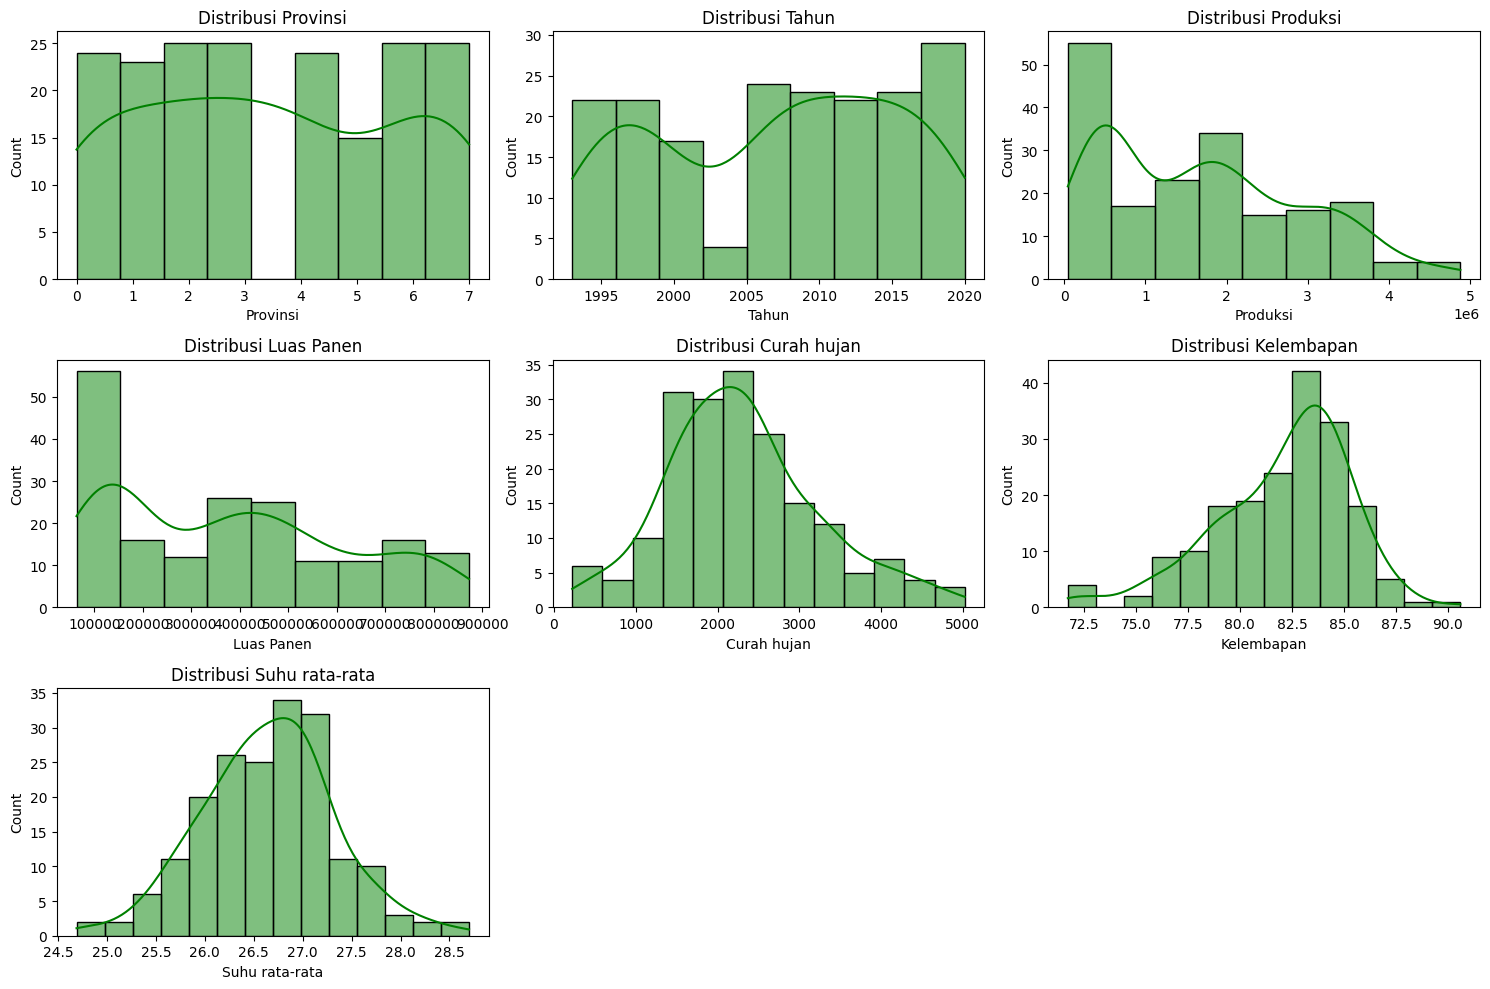

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_filtered.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_filtered[column], kde=True, color='green')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [ ]:
scaler = MinMaxScaler()
df_normalized = df_filtered.copy()
numeric_columns = df_normalized.select_dtypes(include=['int64', 'float64']).columns.drop('Provinsi')
df_normalized[numeric_columns] = scaler.fit_transform(df_normalized[numeric_columns])

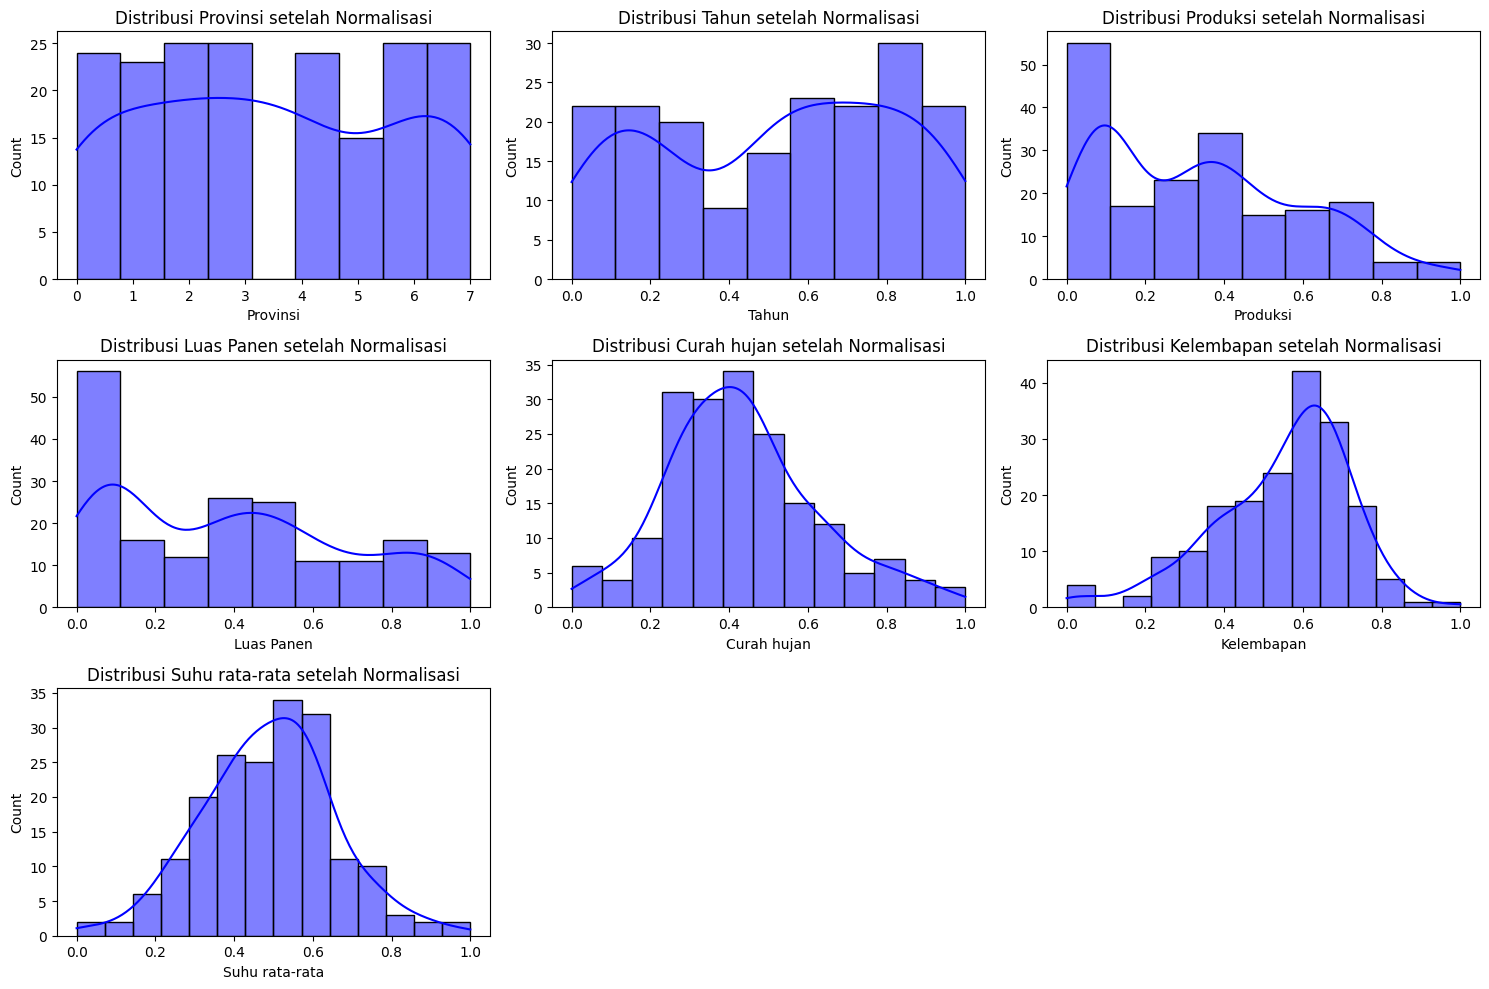

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_normalized.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_normalized[column], kde=True, color='blue')
    plt.title(f'Distribusi {column} setelah Normalisasi')

plt.tight_layout()
plt.show()

In [ ]:
df_normalized.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,0,0.000000,0.265928,0.321700,0.292635,0.544250,0.341646
1,0,0.037037,0.259761,0.328435,0.270549,0.550609,0.556110
2,0,0.074074,0.276958,0.341048,0.261173,0.582406,0.394015
3,0,0.111111,0.284445,0.352128,0.278050,0.597244,0.346633
4,0,0.148148,0.273893,0.338958,0.232628,0.568627,0.403990


In [ ]:
df_normalized.describe()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,3.462366,0.518917,0.342836,0.389456,0.434394,0.548256,0.487598
std,2.327551,0.310041,0.248434,0.295001,0.193331,0.171235,0.169159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.250000,0.222222,0.103982,0.102869,0.299240,0.438262,0.382793
50%,3.000000,0.555556,0.321638,0.370756,0.423680,0.583996,0.501247
75%,6.000000,0.777778,0.510213,0.575739,0.533826,0.655140,0.600998
max,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_normalized.to_csv('padi_clean.csv', index=False)

In [ ]:
from joblib import dump

# Menyimpan scaler dan label encoder
dump(scaler, 'scaler.joblib')
dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

# Insight
1. Telah melakukan label encode untuk kolom kategorikal provinsi dengan hasil label seperti berikut:
 - 0: Aceh,
 - 1: Bengkulu
 - 2: Jambi
 - 3: Lampung
 - 4: Riau
 - 5: Sumatera Barat
 - 6: Sumatera Selatan
 - 7: Sumatera Utara
2. sudah melakukan penghapusan Outliner pada dataset dengan menggunakan metode IQR untuk mengidentifikasi dan menghapus outlier, yang meningkatkan kualitas data dan mengurangi potensi bias dalam model
3. lalu telah melakukan normalisasi MinMax Scaler
